## HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

### Note: You can find the dataset in the link below.

### Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
hr_data = pd.read_csv("https://raw.githubusercontent.com/parulsharma247/ml-projects/main/IBM_HR_Attrition_Rate_Analytics/HR-Employee-Attrition.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [78]:
attrition_data = hr_data.copy()

In [79]:
attrition_data.shape

(1470, 35)

In [80]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Number of columns is 35 which is quite high 

In [81]:
# getting the details about the data type of different columns

attrition_data.columns.to_series().groupby(attrition_data.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

#### First, I will analyze the Categorical features as they are needed to be converted into categorical columns

In [82]:
attrition_data_categorical = attrition_data[['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]
attrition_data_categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [83]:
for col in attrition_data_categorical:
    print("For feature ", col)
    print(attrition_data_categorical[col].value_counts(),'\n')

For feature  Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64 

For feature  BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

For feature  Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

For feature  EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

For feature  Gender
Male      882
Female    588
Name: Gender, dtype: int64 

For feature  JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [84]:
attrition_data_categorical_temp = pd.get_dummies(attrition_data_categorical, columns = attrition_data_categorical.columns, drop_first = True, dtype='int32' )
attrition_data_categorical_temp

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1466,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1467,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1468,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [85]:
attrition_data_categorical_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition_Yes                      1470 non-null   int32
 1   BusinessTravel_Travel_Frequently   1470 non-null   int32
 2   BusinessTravel_Travel_Rarely       1470 non-null   int32
 3   Department_Research & Development  1470 non-null   int32
 4   Department_Sales                   1470 non-null   int32
 5   EducationField_Life Sciences       1470 non-null   int32
 6   EducationField_Marketing           1470 non-null   int32
 7   EducationField_Medical             1470 non-null   int32
 8   EducationField_Other               1470 non-null   int32
 9   EducationField_Technical Degree    1470 non-null   int32
 10  Gender_Male                        1470 non-null   int32
 11  JobRole_Human Resources            1470 non-null   int32
 12  JobRole_Laboratory T

In [86]:
# dropping the categorical columns

attrition_data.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], axis=1, inplace=True)
attrition_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [87]:
attrition_data.info() # just confirming that all he remaining features are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [88]:
# Adding the one hot dummy converted numeric features to main dataframe
attrition_data[attrition_data_categorical_temp.columns] = attrition_data_categorical_temp
attrition_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [89]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

# EDA

[Text(0.5, 1.0, 'Correlation map')]

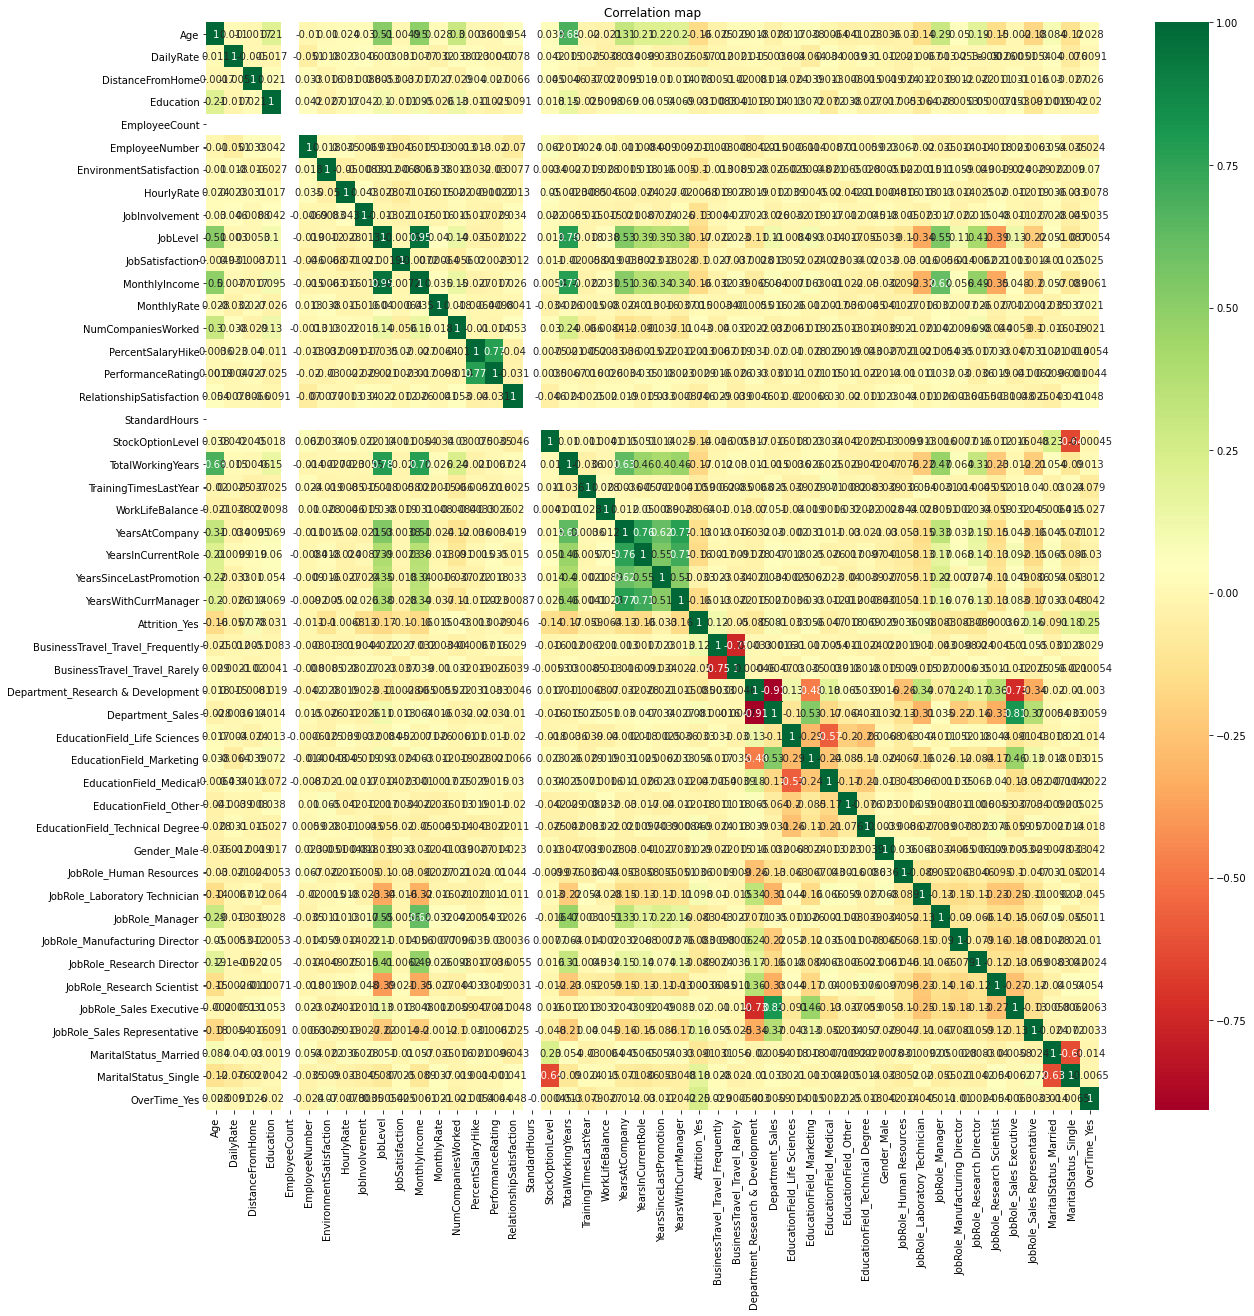

In [90]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(attrition_data.corr(), annot = True, cmap ='RdYlGn')
ax.set(title="Correlation map")

In [91]:
(attrition_data.corr()['Attrition_Yes'])*100

Age                                  -15.920501
DailyRate                             -5.665199
DistanceFromHome                       7.792358
Education                             -3.137282
EmployeeCount                               NaN
EmployeeNumber                        -1.057724
EnvironmentSatisfaction              -10.336898
HourlyRate                            -0.684555
JobInvolvement                       -13.001596
JobLevel                             -16.910475
JobSatisfaction                      -10.348113
MonthlyIncome                        -15.983958
MonthlyRate                            1.517021
NumCompaniesWorked                     4.349374
PercentSalaryHike                     -1.347820
PerformanceRating                      0.288875
RelationshipSatisfaction              -4.587228
StandardHours                               NaN
StockOptionLevel                     -13.714492
TotalWorkingYears                    -17.106325
TrainingTimesLastYear                 -5

#### There are no features who have high correlation with our target feature.
#### Now, checking the correlation of features with each other and if one of two features that have a correlation higher than 0.9 then we will remove one of them

In [92]:
# we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

print("Shape of attrition_data before removing highly correlated features is: ",attrition_data.shape)
corr = attrition_data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = attrition_data.columns[columns]
attrition_data = attrition_data[selected_columns]
print("Shape of attrition_data after removing highly correlated features is: ",attrition_data.shape)
attrition_data

Shape of attrition_data before removing highly correlated features is:  (1470, 48)
Shape of attrition_data after removing highly correlated features is:  (1470, 47)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


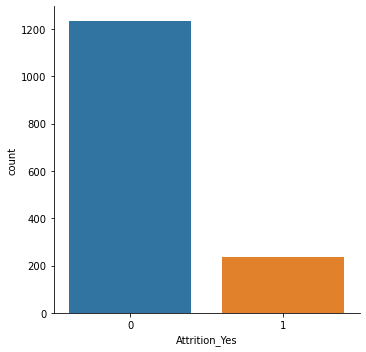

In [77]:
# checking the distribution of our dependent variable
sns.catplot(x='Attrition_Yes', data=attrition_data, kind='count')
plt.show()

### from the above distribution it is clear that the data is imbalaced and it is needed to be corrected, otherwise final model will be biased.

In [93]:
# splitting the dependent and independent features

print(attrition_data.shape)
y = attrition_data['Attrition_Yes']
X = attrition_data.drop('Attrition_Yes', axis =1)
print(X.shape, y.shape)

(1470, 47)
(1470, 46) (1470,)


In [94]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape)

(984, 46) (486, 46)


In [102]:
# applying the SMOTE for balancing the imbalanced data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_sampled, y_train_sampled = sm.fit_resample(X_train, y_train)
X_test_sampled, y_test_sampled = sm.fit_resample(X_test, y_test)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_train_sampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sampled == 0)))

Before OverSampling, counts of label '1': 167
Before OverSampling, counts of label '0': 817

After OverSampling, counts of label '1': 817
After OverSampling, counts of label '0': 817


In [106]:
print(X_train_sampled.shape, X_train.shape,'\n',X_test_sampled.shape,X_test.shape)

(1634, 46) (984, 46) 
 (832, 46) (486, 46)


In [107]:
print(y_train_sampled.shape, y_train.shape,'\n', y_test_sampled.shape, y_test.shape)

(1634,) (984,) 
 (832,) (486,)


In [105]:
# checking the final count of each data type in our dependent feature

y_train_sampled.value_counts()

1    817
0    817
Name: Attrition_Yes, dtype: int64

In [108]:
# applying the standard scaler to standardize our data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_sampled = pd.DataFrame(data=ss.fit_transform(X_train_sampled), columns=X_train_sampled.columns)
X_test_sampled = pd.DataFrame(data=ss.fit_transform(X_test_sampled), columns=X_test_sampled.columns)

X_train_sampled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.972674,-0.895197,-1.111424,-0.749742,0.0,1.293450,0.501327,1.714895,0.674070,-0.737854,...,-0.379813,-0.208381,-0.238581,-0.195242,2.375348,-0.404744,-0.237145,-0.713283,-0.677443,1.495207
1,1.309567,-1.074743,-0.981156,1.252020,0.0,0.697356,-1.383986,0.804693,0.674070,2.167335,...,-0.379813,-0.208381,-0.238581,5.121849,-0.420991,-0.404744,-0.237145,1.401969,-0.677443,-0.668804
2,-0.374898,-0.892632,1.884742,1.252020,0.0,-0.448715,-1.383986,0.697610,0.674070,0.230542,...,2.632877,-0.208381,-0.238581,-0.195242,-0.420991,-0.404744,-0.237145,1.401969,-0.677443,-0.668804
3,0.298888,-1.067048,-1.111424,-1.750624,0.0,-0.636595,0.501327,-1.283419,0.674070,-0.737854,...,-0.379813,-0.208381,-0.238581,-0.195242,2.375348,-0.404744,-0.237145,-0.713283,1.476140,-0.668804
4,1.758757,-0.020554,-0.590352,0.251139,0.0,0.541928,0.501327,0.911775,0.674070,2.167335,...,-0.379813,4.798897,-0.238581,-0.195242,-0.420991,-0.404744,-0.237145,-0.713283,-0.677443,1.495207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,0.074292,-0.800294,0.060988,-0.749742,0.0,-1.575998,0.501327,0.536986,-0.649765,-0.737854,...,-0.379813,-0.208381,-0.238581,-0.195242,-0.420991,-0.404744,-0.237145,-0.713283,-0.677443,1.495207
1630,-1.385577,-0.654093,-0.590352,-1.750624,0.0,1.488162,0.501327,0.001573,0.674070,-0.737854,...,-0.379813,-0.208381,-0.238581,-0.195242,2.375348,-0.404744,-0.237145,-0.713283,-0.677443,1.495207
1631,-0.824089,0.941297,0.060988,-1.750624,0.0,1.269538,0.501327,-0.051969,-0.649765,-0.737854,...,-0.379813,-0.208381,-0.238581,-0.195242,-0.420991,-0.404744,-0.237145,1.401969,-0.677443,1.495207
1632,1.197269,-0.543801,-0.329816,1.252020,0.0,1.054329,0.501327,0.483445,-0.649765,0.230542,...,-0.379813,-0.208381,-0.238581,-0.195242,-0.420991,-0.404744,-0.237145,-0.713283,-0.677443,-0.668804


In [110]:
X_test_sampled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.840094,0.299909,-0.571292,0.301095,0.0,0.955749,1.349633,1.158699,0.651294,0.201852,...,-0.388279,-0.206413,-0.271198,-0.156941,-0.369611,2.204349,-0.164804,-0.706469,1.500000,-0.545868
1,2.023550,0.893884,0.482329,-0.774060,0.0,-1.365623,1.349633,-0.288805,1.957021,0.201852,...,-0.388279,-0.206413,3.687342,-0.156941,-0.369611,-0.453649,-0.164804,-0.706469,-0.666667,-0.545868
2,-1.298277,-1.405727,1.667653,-1.849215,0.0,1.422309,1.349633,-0.235194,-1.960159,-0.809840,...,-0.388279,-0.206413,-0.271198,-0.156941,-0.369611,-0.453649,-0.164804,1.415489,-0.666667,-0.545868
3,1.107184,1.588672,-0.307887,0.301095,0.0,-1.677933,-0.442697,-0.181582,0.651294,1.213545,...,-0.388279,-0.206413,-0.271198,-0.156941,2.705550,-0.453649,-0.164804,-0.706469,-0.666667,-0.545868
4,0.076272,1.743978,-0.571292,-0.774060,0.0,-1.262790,1.349633,-0.020749,0.651294,0.201852,...,2.575466,-0.206413,-0.271198,-0.156941,-0.369611,-0.453649,-0.164804,-0.706469,1.500000,-0.545868


### work on model building

In [ ]:
# Logistic regression model

from sklearn.linear_model import Logisticregression
model = Logisticregression()
model.fit(X_train_sampled, y_train_sampled)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
